/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


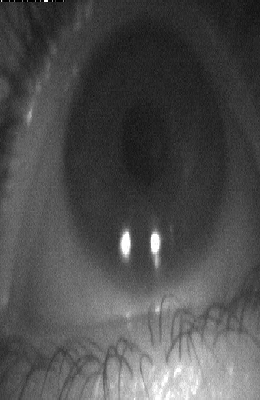

In [1]:
from keras.preprocessing import image

test_image = image.load_img('open/train/openedEye0.jpg', target_size = (400, 260))
test_image 

In [2]:
test_image = image.img_to_array(test_image)
test_image.shape

(400, 260, 3)

In [3]:
import numpy as np
import pandas as pd

In [4]:
X = np.append([image.img_to_array(image.load_img('open/train/openedEye'+str(i)+'.jpg', target_size = (400, 260))) 
        for i in range(100)], [image.img_to_array(image.load_img('closed/closedEye'+str(i)+'.jpg', 
                                target_size = (400, 260))) 
        for i in range(346)], axis=0)

y = np.append(np.ones(100), np.zeros(346), axis=0)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train/255.
X_test = X_test/255.

In [6]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense
from keras import regularizers

def lenet5(regul=0):
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(400,260,3)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer C3
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=120, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    # Layer F6
    model.add(Dense(units=84, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    # Output layer
    model.add(Dense(units=1, activation = 'sigmoid', kernel_regularizer=regularizers.l2(regul)))
    
    return model

In [7]:
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

# Instantiate the model
model_1 = lenet5()

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Finally fit the model
model_1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=20, 
          batch_size=64)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 356 samples, validate on 90 samples
Epoch 1/20
356/356 [==============================] - 25s 70ms/step - loss: 2.9449 - acc: 0.7949 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 2/20
356/356 [==============================] - 22s 62ms/step - loss: 3.3051 - acc: 0.7949 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 3/20
356/356 [==============================] - 23s 63ms/step - loss: 3.3051 - acc: 0.7949 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 4/20
356/356 [==============================] - 22s 63ms/step - loss: 3.3051 - acc: 0.7949 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 5/20
356/356 [==============================] - 21s 59ms/step - loss: 3.3051 - acc: 0.7949 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 6/20
356/356 [==============================] - 29s 82ms/step - loss: 3.3051 - acc: 0.7949 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 7/20
356/356 [===========

In [8]:
from sklearn.metrics import accuracy_score

# Compute the accuracy
y_pred_train = [np.around(i) for i in model_1.predict(X_train)]
y_pred_test = [np.around(i) for i in model_1.predict(X_test)]

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test))

accuracy on train with NN: 0.7949438202247191
accuracy on test with NN: 0.7


Woooooooooooow ! On réconnait déjà à coup sur si l'oeil est ouvert ou fermé ! Regardons maintenant s'il peut détecter la pupille de l'oeil

In [9]:
model_1.predict(X_train)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [10]:
X_open = np.array([image.img_to_array(image.load_img('open/train/openedEye'+str(i)+'.jpg', target_size = (400, 260))) 
        for i in range(480)])

In [11]:
y_open = pd.read_csv('open/train/dataPupilCenter.csv')

In [12]:
pd.read_csv('open/train/dataPupilCenter.csv').head()

,id,xcentral,ycentral
0,0,220,90
1,1,235,102
2,2,221,138
3,3,307,84
4,4,295,80


In [13]:
print(y_open.shape)
print(X_open.shape)

(480, 3)
(480, 400, 260, 3)


In [14]:
to_remove = y_open[y_open.ycentral=='?']['id'].values
to_remove

array([151, 152, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 173,
       175, 176, 177, 178, 191, 192, 229, 230, 259, 260, 261, 262, 263,
       265, 266, 267, 269, 270, 271, 272, 273, 274, 275, 289, 291, 292,
       293, 443, 444, 445, 462, 463, 464, 465, 466, 467])

In [15]:
y_open = y_open[~y_open.id.isin(to_remove)]

In [16]:
X_open = np.array([image.img_to_array(image.load_img('open/train/openedEye'+str(i)+'.jpg', target_size = (400, 260))) 
        for i in range(480) if i not in list(to_remove)])

In [17]:
print(y_open.shape)
print(X_open.shape)

(431, 3)
(431, 400, 260, 3)


In [18]:
def lenet(regul=0):
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(400,260,3)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer C3
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=120, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    # Layer F6
    model.add(Dense(units=84, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    # Output layer
    model.add(Dense(units=2, activation = 'relu', kernel_regularizer=regularizers.l2(regul)))
    
    return model

In [19]:
y_open.xcentral = y_open.xcentral.apply(lambda x : float(x)/387)
y_open.ycentral = y_open.ycentral.apply(lambda x : float(x)/259)

In [20]:
y_open = y_open[['xcentral', 'ycentral']].values.astype(float)

In [21]:
X_train_open, X_test_open, y_train_open, y_test_open = train_test_split(X_open, y_open, test_size=0.2, random_state=42)

X_train_open = X_train_open/255.
X_test_open = X_test_open/255.

In [22]:
from keras import optimizers

# Instantiate the model
model_4 = lenet()

# Compile the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_4.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

# Finally fit the model
model_4.fit(x=X_train_open,
            y=y_train_open,
            validation_data=(X_test_open, y_test_open),
            epochs=0,
            batch_size=20)

Train on 344 samples, validate on 87 samples


In [23]:
test_img = X_train_open[22]

In [24]:
from matplotlib import pyplot as plt 
plt.imshow(test_img)

In [25]:
np.expand_dims(test_img, axis=0).shape

(1, 400, 260, 3)

In [26]:
model_1.predict(np.expand_dims(test_img, axis=0))

array([[0.]], dtype=float32)

In [27]:
a = np.random.randint(344)
img = X_train_open[a]

inpt = np.expand_dims(img, axis=0)
is_closed = model_1.predict(inpt)

center = (int(model_4.predict(np.expand_dims(inpt, axis=0))[0][0]*367), 
          int(model_4.predict(np.expand_dims(test_img, axis=0))[0][0]*259))
center

ValueError: Error when checking input: expected conv2d_3_input to have 4 dimensions, but got array with shape (1, 1, 400, 260, 3)

In [ ]:
import cv2
# METHOD 1 : 2 models
a = np.random.randint(344)
img = X_train_open[a]

inpt = np.expand_dims(img, axis=0)
is_closed = model_1.predict(inpt)

if is_closed<0.3:
    print("Eye is closed")
    plt.imshow(img)
else:
    print("Eye is opened")
    pupille_center = (int(model_4.predict(inpt)[0][1]*367), 
          int(model_4.predict(inpt)[0][0]*259))
    plt.imshow(cv2.circle(img, pupille_center, 23, (0,255,0), 1))